**Kyle's Scratch Code (before function):

I feel like I should be getting a correct plot with the additions to the code. However, I am running into an error with the np.linalg.eigh() function. When that cell is run, it says that I am supplying a 0-dimensional array, rather than a 2-dimensional array.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance

n_dimensions=3
n_points=100

#Create samples on a unit sphere in desired dimensions
def hypersphere(npoints, ndim):
    np.random.seed(1)
    vec=np.random.randn(ndim,npoints) #creates a random sample from a Gaussian distribution in the form of an array of dimensions: ndim x npoints
    vec/=np.linalg.norm(vec,axis=0) #divides each vector by its norm, which turns each vector into a unit vector (length 1). Here we obtain samples from the unit sphere in the dimension we stated in the beginning of the function.
    return(vec)

In [3]:
#Randomly select a point on the hypersphere to be the center of the ball
random.seed(1)
hsphere=hypersphere(n_points,n_dimensions)
dim_array=np.shape(hsphere) #defines the shape of the array
rng=random.randint(0,dim_array[1])#pulls random number from 0 to n_points and assign to rng
center_ball=hsphere[:,rng] #uses randomly generated number to extract one row of points
print(center_ball)
print(hsphere[0:2,0])

[-0.46457661 -0.85509238 -0.23018598]
[ 0.93795301 -0.25818745]


In [8]:
radii = np.arange(.1,1.01,.01) #creates an array of radii values to iterate through
eigval_list = [] #creates empty list to store eigen values

#Find the points on the hypersphere within each radii
for i in radii: #iteratest through each radii value
    X=np.empty([0,dim_array[0]]) #creates an empty array to be filled in with the values on the hypersphere that fall within the ball radii
    for j in np.arange(0,n_points): #iterates through array of index values for each point
        if distance.euclidean(hsphere[:,j],center_ball)<=i: #selects points whose distance to center is shorter than the length of the radius
            if np.shape(X)==(0,dim_array[0]):
                X=np.append(X,hsphere[:,j]) #appends first point coordinates to the empty array
            else:
                X=np.vstack((X,hsphere[:,j])) #vertically stacks subsequent points to the empty array
    dim_X=np.shape(X) #saves dimensions of matrix for points within the current radius
    
    #Create the covariance matrix and save eigenvalues for each set X
    mean_X=np.mean(X,axis=0) #calculates the mean of X
    X_centered= X - mean_X #centers the set X by subtracting the mean from each point
    cov_X= 1/dim_X[0] * (X_centered.T @ X_centered) #calculates the covariance of the new centered set
    eigvals,eigvecs=np.linalg.eigh(cov_X) #computes the eigenvalues and eigenvectors of the covariance matrix and stores them in the respective variables
    eigval_list.append(eigvals) #appends the set of eigenvalues to the list created above
    
#Plot the eigenvalues
eig_mat=np.stack(eigval_list, axis=0) #stacks eigenvalue list into an array (dimensions of N x D)
dim_eig_mat=np.shape(eig_mat)
fig=plt.figure() #creates a figure plot
axes=fig.add_subplot(111) #adds x and y axes to the plot
for i in range(dim_eig_mat):
    axes.plot(radii, eig_mat[:,i]) #plots eigenvalues (y-axis) against each radii value (x-axis) 
    
plt.show()

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [4]:
distance.euclidean(hsphere[:,22],center_ball)

1.921649874320172

In [5]:
x=np.empty([0,3])

In [6]:
a=[1,2,3]
x=np.vstack((x,a))
x

array([[1., 2., 3.]])

In [6]:
dim_X[0]

22

**The Cleaned Up Code (function):

In [9]:
#empty rn

<h1>Ryan's Comments</h1>
<p>
    Hey Kyle! Here's me presenting an idea as to how you could approach the covariance matrix. Let $X_c$ be the set of points within some radius $\epsilon$ of center point $c$. We assume that $X_c$ consists of $N$ points in $d$ dimensions, and we represent it as a $N\times d$ matrix.
    <br/><br/>
    In the block below, I generate $X_c$ as a random $N\times d$ matrix, just so that the cell below runs.
</p>

In [15]:
# Initialize N, d, X_c
N = 500
d = 20
X_c = np.random.randn(N, d)

# Center points at their mean
# axis = 0 makes sure that the mean of each column is taken from all rows
mean = np.mean(X_c, axis=0)
X_cc = X_c - mean

# For now, we assume that our data need not be normalized
# For 2-dimensional NumPy arrays, "@" defaults to the standard matrix product 
covariance = 1/N * (X_cc.T @ X_cc)

# Get eigenvalues and eigenvectors through np.linalg.eigh
eigvals, eigvecs = np.linalg.eigh(covariance)

# Eigenvalues should be sorted in increasing order
print(eigvals)

[0.67884518 0.70600253 0.74198868 0.75336952 0.78484792 0.84315281
 0.85558102 0.87747828 0.9227601  0.94200876 0.95385887 0.9810369
 0.99708885 1.04640382 1.12019509 1.1550586  1.21367774 1.30595078
 1.33825989 1.42521009]


<p>
    In the cell below, I'm going to show one way to plot the eigenvalues coming from np.linalg.eigh ; it boils down to me saving the eigenvalues from each iteration of the loop.
</p>

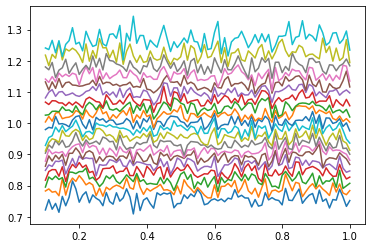

In [5]:
import numpy as np

# initialize empty list
eigval_list = []

# Collect eigenvalues each iteration
for r in np.arange(0.1, 1.01, 0.01):
    ### Replace this chunk with some process dependent on r
    # 1000 points, 20 dimensions
    X = np.random.randn(1000, 20)
    cov = 1/1000 * (X.T @ X)
    eigvals, eigvecs = np.linalg.eigh(cov)
    # Save eigenvalues
    eigval_list.append(eigvals)
    ### end chunk

# Each element of eigval_list is a numpy array of shape (20, )
# I am going to merge these into an array of shape (1000, 20)
# Each row corresponds to a specific PCA,
# the k-th column corresponds to the k-th highest eigenvalue for that PCA
eig_mat = np.stack(eigval_list, axis=0)

# Matplotlib stuff
# The following line is only necessary for Jupyter to present the figures graphically
%matplotlib inline
import matplotlib.pyplot as plt

# Make figure object
fig = plt.figure()
# Add a single set of 2D axes to draw on
# The input "111" means 1 row, 1 column; the first axis in such a division of the figure
ax = fig.add_subplot(111)

# plot all (20) eigenvalues as a function of r
rs = np.arange(0.1, 1.01, 0.01)
for j in range(20):
    # for a 2D numpy array A, we have that A[:, j] means the 1D array
    # that results from restricting A to its j-th column
    ax.plot(rs, eig_mat[:, j])

# show figure below
plt.show()